**FEATURE SELECTION**

Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

Feature selection models are of two types:

**Supervised Models**: Supervised feature selection refers to the method which uses the output label class for feature selection. They use the target variables to identify the variables which can increase the efficiency of the model

**Unsupervised Models**: Unsupervised feature selection refers to the method which does not need the output label class for feature selection. We use them for unlabelled data.

**Filter Method**: In this method, features are dropped based on their relation to the output, or how they are correlating to the output. We use correlation to check if the features are positively or negatively correlated to the output labels and drop features accordingly. Eg: Information Gain, Chi-Square Test

**INFORMATION GAIN**

 It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values. Information gain of each attribute is calculated considering the target values for feature selection.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris


iris = load_iris()
X, y = iris.data, iris.target

# Calculate Information Gain using mutual_info_classif
info_gain = mutual_info_classif(X, y)
print("Information Gain for each feature:", info_gain)

Information Gain for each feature: [0.51554063 0.22662331 0.99376424 0.97351533]


In [ ]:
import scipy as sp
import pandas as pd
import numpy as np
from scipy.stats import entropy

In [ ]:
df=pd.read_csv('Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
region_counts = df['PetalLengthCm'].value_counts()


In [ ]:
print(region_counts)

PetalLengthCm
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: count, dtype: int64


In [ ]:
region_entropy = entropy(region_counts, base=2)
print(region_entropy)


5.033829378702224


In [ ]:
channel_counts = df['Species'].value_counts()
channel_entropy = entropy(channel_counts, base=2)


weighted_entropy = 0

for region in df['PetalLengthCm'].unique():
    subset = df[df['PetalLengthCm'] == region]
    subset_channel_counts = subset['Species'].value_counts()
    subset_entropy = entropy(subset_channel_counts, base=2)


    weight = len(subset) / len(df)
    weighted_entropy += weight * subset_entropy


info_gain = channel_entropy - weighted_entropy

print(f"Information Gain for 'petalwitdhcm' in predicting 'spcies': {info_gain:.4f} bits")


Information Gain for 'petalwitdhcm' in predicting 'spcies': 1.4463 bits


**CHI-SQUARE TEST**

is a statistical method crucial for analyzing associations in categorical data. Its applications span various fields, aiding researchers in understanding relationships between factors.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Converting to DataFrame for better visualization
column_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=column_names)
df['target'] = y

print("Original Dataset:")
print(df.head())

# Applying Chi-Square feature selection and
# Selecting top k features
k = 2
chi2_selector = SelectKBest(chi2, k=k)
X_new = chi2_selector.fit_transform(X, y)

selected_features = df.columns[:-1][chi2_selector.get_support()]
print("\nSelected Features:")
print(selected_features)


Original Dataset:
   feature_0  feature_1  feature_2  feature_3  target
0        5.1        3.5        1.4        0.2       0
1        4.9        3.0        1.4        0.2       0
2        4.7        3.2        1.3        0.2       0
3        4.6        3.1        1.5        0.2       0
4        5.0        3.6        1.4        0.2       0

Selected Features:
Index(['feature_2', 'feature_3'], dtype='object')



Selected Features: ['Petal Length', 'Petal Width']


<ipython-input-15-9809687dcc95>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')


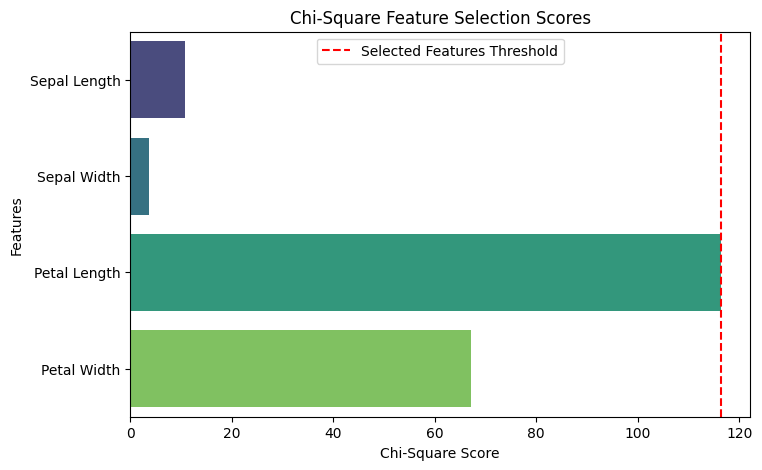

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2


iris = load_iris()
X = iris.data
y = iris.target


df = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df['Species'] = y

# Apply Chi-Square feature selection
k = 2
chi2_selector = SelectKBest(chi2, k=k)
chi2_selector.fit(X, y)

# Get feature scores
scores = chi2_selector.scores_

# Create a DataFrame for feature scores
feature_scores = pd.DataFrame({
    'Feature': df.columns[:-1],  # Exclude 'Species'
    'Score': scores
})

# Print selected features
selected_features = df.columns[:-1][chi2_selector.get_support()]
print("\nSelected Features:", selected_features.tolist())

# Plotting the feature scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Chi-Square Feature Selection Scores')
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.axvline(x=scores[chi2_selector.get_support()].max(), color='red', linestyle='--', label='Selected Features Threshold')
plt.legend()
plt.show()



Selected Features: ['Petal Length', 'Petal Width']


<ipython-input-20-d09f5202c489>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi2_selector.scores_, y=df.columns[:-1], palette='viridis')


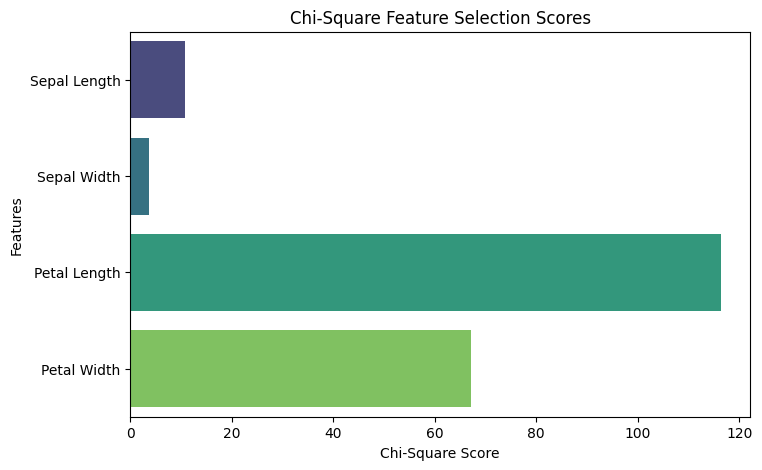

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2


iris = load_iris()
X = iris.data
y = iris.target


df = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df['Species'] = y

# Apply Chi-Square feature selection
chi2_selector = SelectKBest(chi2, k=2)
chi2_selector.fit(X, y)

# Get selected features
selected_features = df.columns[:-1][chi2_selector.get_support()]

# Print selected features
print("\nSelected Features:", selected_features.tolist())

# Create a bar plot for feature scores
plt.figure(figsize=(8, 5))
sns.barplot(x=chi2_selector.scores_, y=df.columns[:-1], palette='viridis')
plt.title('Chi-Square Feature Selection Scores')
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.show()


**Pearsons's co-relation**

Pearson's correlation is a statistical measure that assesses the strength and direction of the linear relationship between two continuous variables. In the context of machine learning, understanding these correlations can help you identify which features in your dataset are related, which can inform feature selection and engineering.

The coefficient ranges from -1 to 1.

1: Perfect positive correlation (as one variable increases, the other also increases).

-1: Perfect negative correlation (as one variable increases, the other decreases).

0: No correlation (no linear relationship between the variables).

**Sepal Length vs. Petal Length:**

Correlation: 0.871754
Interpretation: There is a strong positive correlation. As the sepal length increases, the petal length also tends to increase significantly.

**Sepal Length vs. Petal Width:**

Correlation: 0.817941
Interpretation: There is also a strong positive correlation between sepal length and petal width, suggesting that larger sepals are associated with larger petals.

**Sepal Width vs. Petal Length:**

Correlation: -0.428440
Interpretation: This shows a moderate negative correlation. As sepal width increases, petal length tends to decrease, but the relationship is not very strong.

**Sepal Width vs. Petal Width:**

Correlation: -0.366126
Interpretation: This is another moderate negative correlation, indicating that larger sepal widths are associated with smaller petal widths.

**Petal Length vs. Petal Width:**

Correlation: 0.962865
Interpretation: There is a very strong positive correlation between petal length and petal width. As the petal length increases, petal width also tends to increase, indicating they are closely related features.

Pearson Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


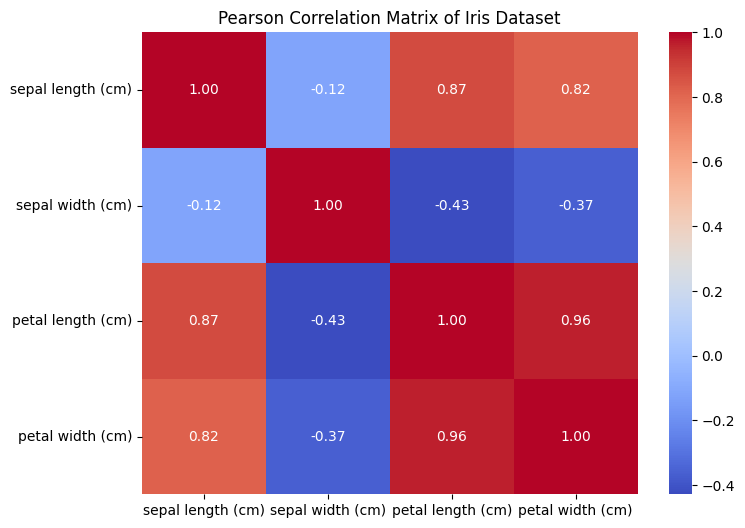

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate the Pearson correlation matrix
correlation_matrix = iris_df.corr(method='pearson')

# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Iris Dataset')
plt.show()


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris


iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
# Select the relevant columns
x = iris_df['sepal length (cm)']
y = iris_df['petal length (cm)']


In [ ]:
mean_x = x.mean()
mean_y = y.mean()

print(f'Mean of Sepal Length: {mean_x}')
print(f'Mean of Petal Length: {mean_y}')


Mean of Sepal Length: 5.843333333333334
Mean of Petal Length: 3.7580000000000005


In [ ]:
n = len(x)
sum_xy = (x * y).sum()
sum_x = x.sum()
sum_y = y.sum()
sum_x2 = (x ** 2).sum()
sum_y2 = (y ** 2).sum()

print(f'n: {n}, Sum(xy): {sum_xy}, Sum(x): {sum_x}, Sum(y): {sum_y}, Sum(x^2): {sum_x2}, Sum(y^2): {sum_y2}')


n: 150, Sum(xy): 3483.76, Sum(x): 876.5, Sum(y): 563.7, Sum(x^2): 5223.85, Sum(y^2): 2582.71


In [ ]:
numerator = n * sum_xy - sum_x * sum_y
denominator = ((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2)) ** 0.5

r = numerator / denominator
print(f'Pearson Correlation Coefficient: {r}')


Pearson Correlation Coefficient: 0.871753775886584


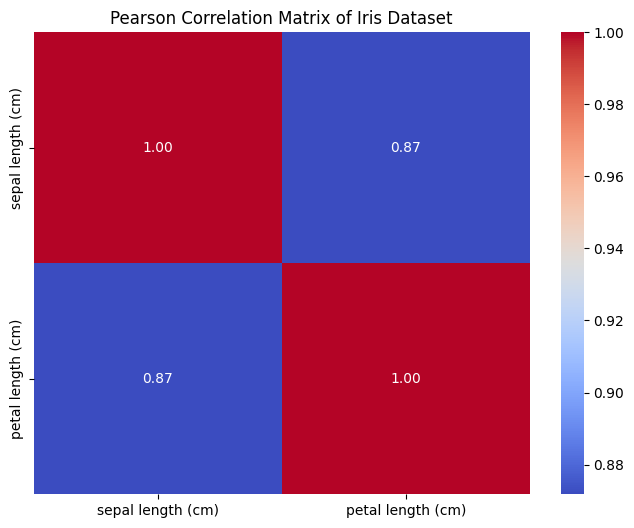

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Iris Dataset')
plt.show()


In [ ]:
# Using pandas to calculate the Pearson correlation coefficient
correlation_matrix = iris_df[['sepal length (cm)', 'petal length (cm)']].corr(method='pearson')
print("Correlation matrix from pandas:")
print(correlation_matrix)


Correlation matrix from pandas:
                   sepal length (cm)  petal length (cm)
sepal length (cm)           1.000000           0.871754
petal length (cm)           0.871754           1.000000


**ANOVA**

ANOVA (Analysis of Variance) is a statistical technique used to compare the means of three or more groups to see if at least one group mean is significantly different from the others. It helps researchers determine whether any observed differences between groups are due to chance or if they are statistically significant.

Types of ANOVA

One-Way ANOVA: Tests the effect of a single factor on a dependent variable.

Two-Way ANOVA: Tests the effects of two factors and their interaction.

Repeated Measures ANOVA: Used when the same subjects are measured multiple times.


**One-Way ANOVA**

Tests the effect of a single factor on a dependent variable.


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from scipy import stats

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species column
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
# Group data by species and extract petal lengths
setosa = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
versicolor = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']
virginica = iris_df[iris_df['species'] == 'virginica']['petal length (cm)']
f_statistic, p_value = stats.f_oneway(setosa, versicolor, virginica)
print(f'F-statistic: {f_statistic}, P-value: {p_value}')


F-statistic: 1180.161182252981, P-value: 2.8567766109615584e-91


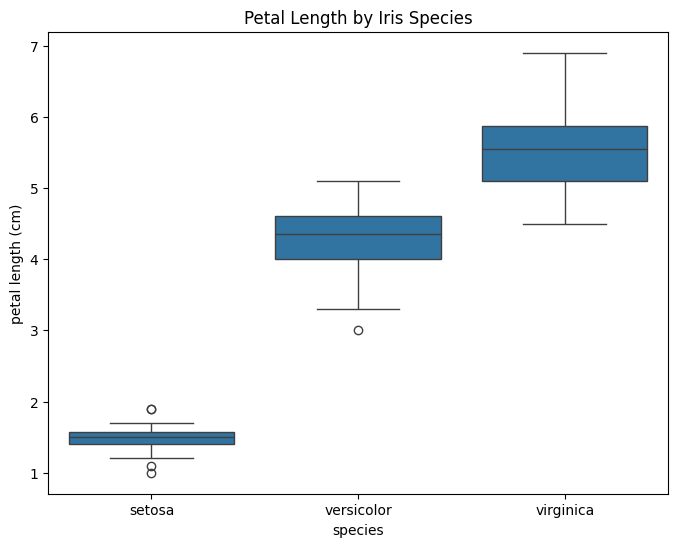

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
plt.title('Petal Length by Iris Species')
plt.show()


<ipython-input-13-58a5a4e75ea8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='species', y='petal length (cm)', data=iris_df, ci='sd', color='blue')


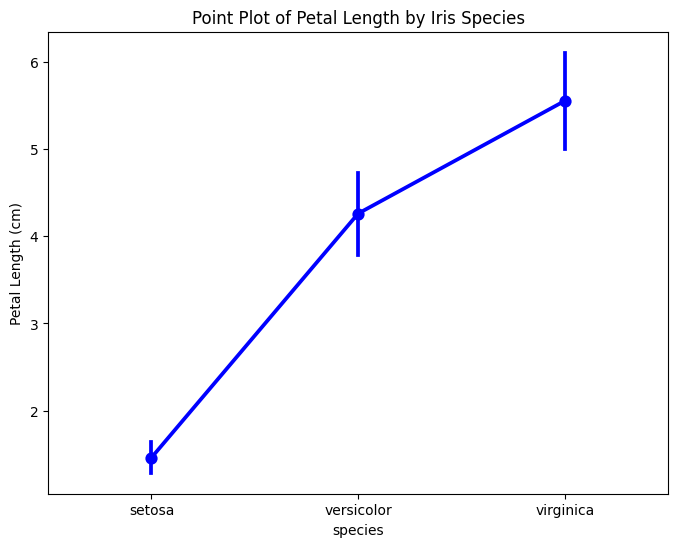

In [ ]:
# Point Plot
plt.figure(figsize=(8, 6))
sns.pointplot(x='species', y='petal length (cm)', data=iris_df, ci='sd', color='blue')
plt.title('Point Plot of Petal Length by Iris Species')
plt.ylabel('Petal Length (cm)')
plt.show()


**TWO WAY ANOVA**

Two-way ANOVA is a statistical method used to determine the effect of two independent categorical variables (factors) on a continuous dependent variable. It also allows you to assess whether there is an interaction between the two factors.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import statsmodels.api as sm
from statsmodels.formula.api import ols

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species column
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [ ]:
# Create the model
model = ols('Q("petal length (cm)") ~ C(species) + Q("petal width (cm)") + C(species):Q("petal width (cm)")', data=iris_df).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                     sum_sq     df          F        PR(>F)
C(species)                        13.011309    2.0  49.789099  3.665504e-17
Q("petal width (cm)")              6.389156    1.0  48.897510  9.337809e-11
C(species):Q("petal width (cm)")   2.017795    2.0   7.721298  6.525078e-04
Residual                          18.815649  144.0        NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


                                          sum_sq     df             F  \
C(species)                          3.780060e+01    2.0  1.238989e+02   
C(petal_width_category)            -2.523507e-11    2.0 -8.271292e-11   
C(species):C(petal_width_category)  5.644079e+02    4.0  9.249792e+02   
Residual                            2.211919e+01  145.0           NaN   

                                          PR(>F)  
C(species)                          3.462163e-21  
C(petal_width_category)             1.000000e+00  
C(species):C(petal_width_category)  2.713634e-94  
Residual                                     NaN  


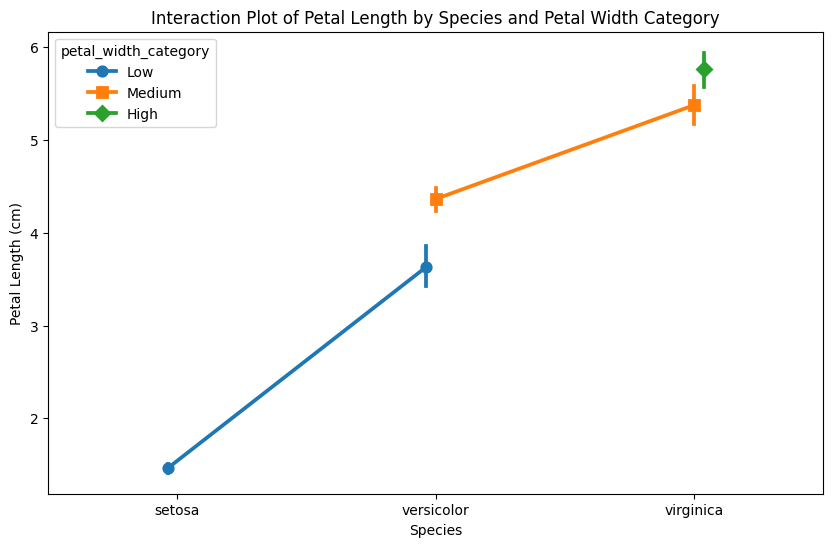

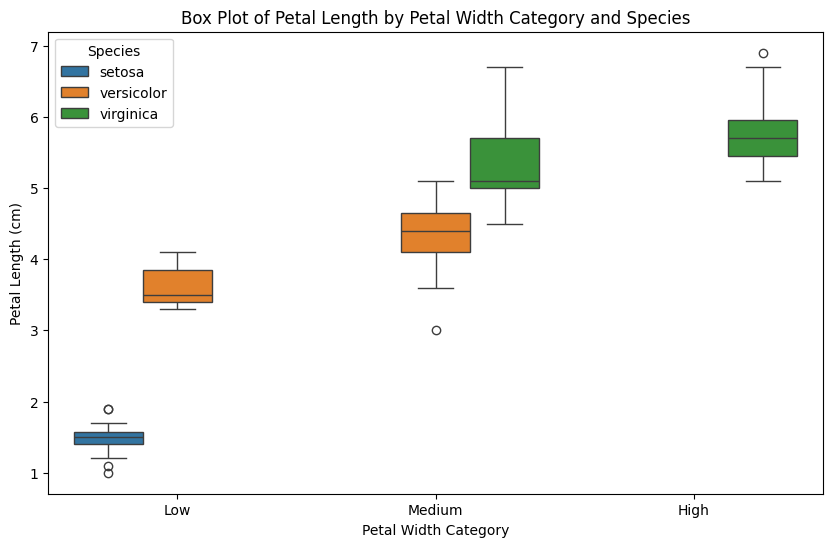

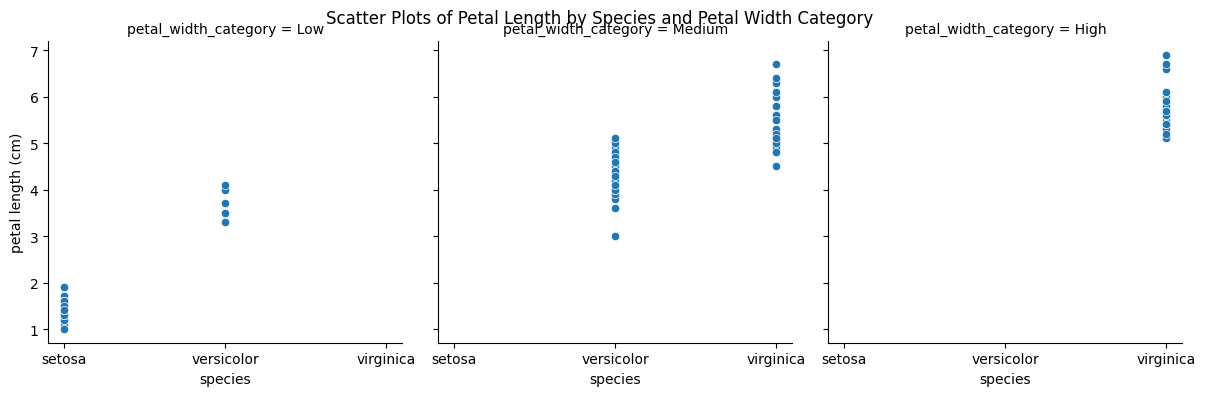

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species column
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Binning petal width into categories
iris_df['petal_width_category'] = pd.cut(iris_df['petal width (cm)'], bins=[0, 1, 2, 3], labels=['Low', 'Medium', 'High'])

# Perform Two-Way ANOVA
model = ols('Q("petal length (cm)") ~ C(species) + C(petal_width_category) + C(species):C(petal_width_category)', data=iris_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 1. Interaction Plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='species', y='petal length (cm)', hue='petal_width_category', data=iris_df, dodge=True, markers=["o", "s", "D"])
plt.title('Interaction Plot of Petal Length by Species and Petal Width Category')
plt.ylabel('Petal Length (cm)')
plt.xlabel('Species')
plt.show()

# 2. Box Plot with Interaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='petal_width_category', y='petal length (cm)', hue='species', data=iris_df)
plt.title('Box Plot of Petal Length by Petal Width Category and Species')
plt.ylabel('Petal Length (cm)')
plt.xlabel('Petal Width Category')
plt.legend(title='Species')
plt.show()



**Repeated measures ANOVA**

Repeated Measures ANOVA is used when you have multiple measurements taken on the same subjects. This is common in experiments where the same subjects are measured under different conditions or over time. The method accounts for the correlation between repeated measures.

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  1.5542 2.0000 58.0000 0.2200



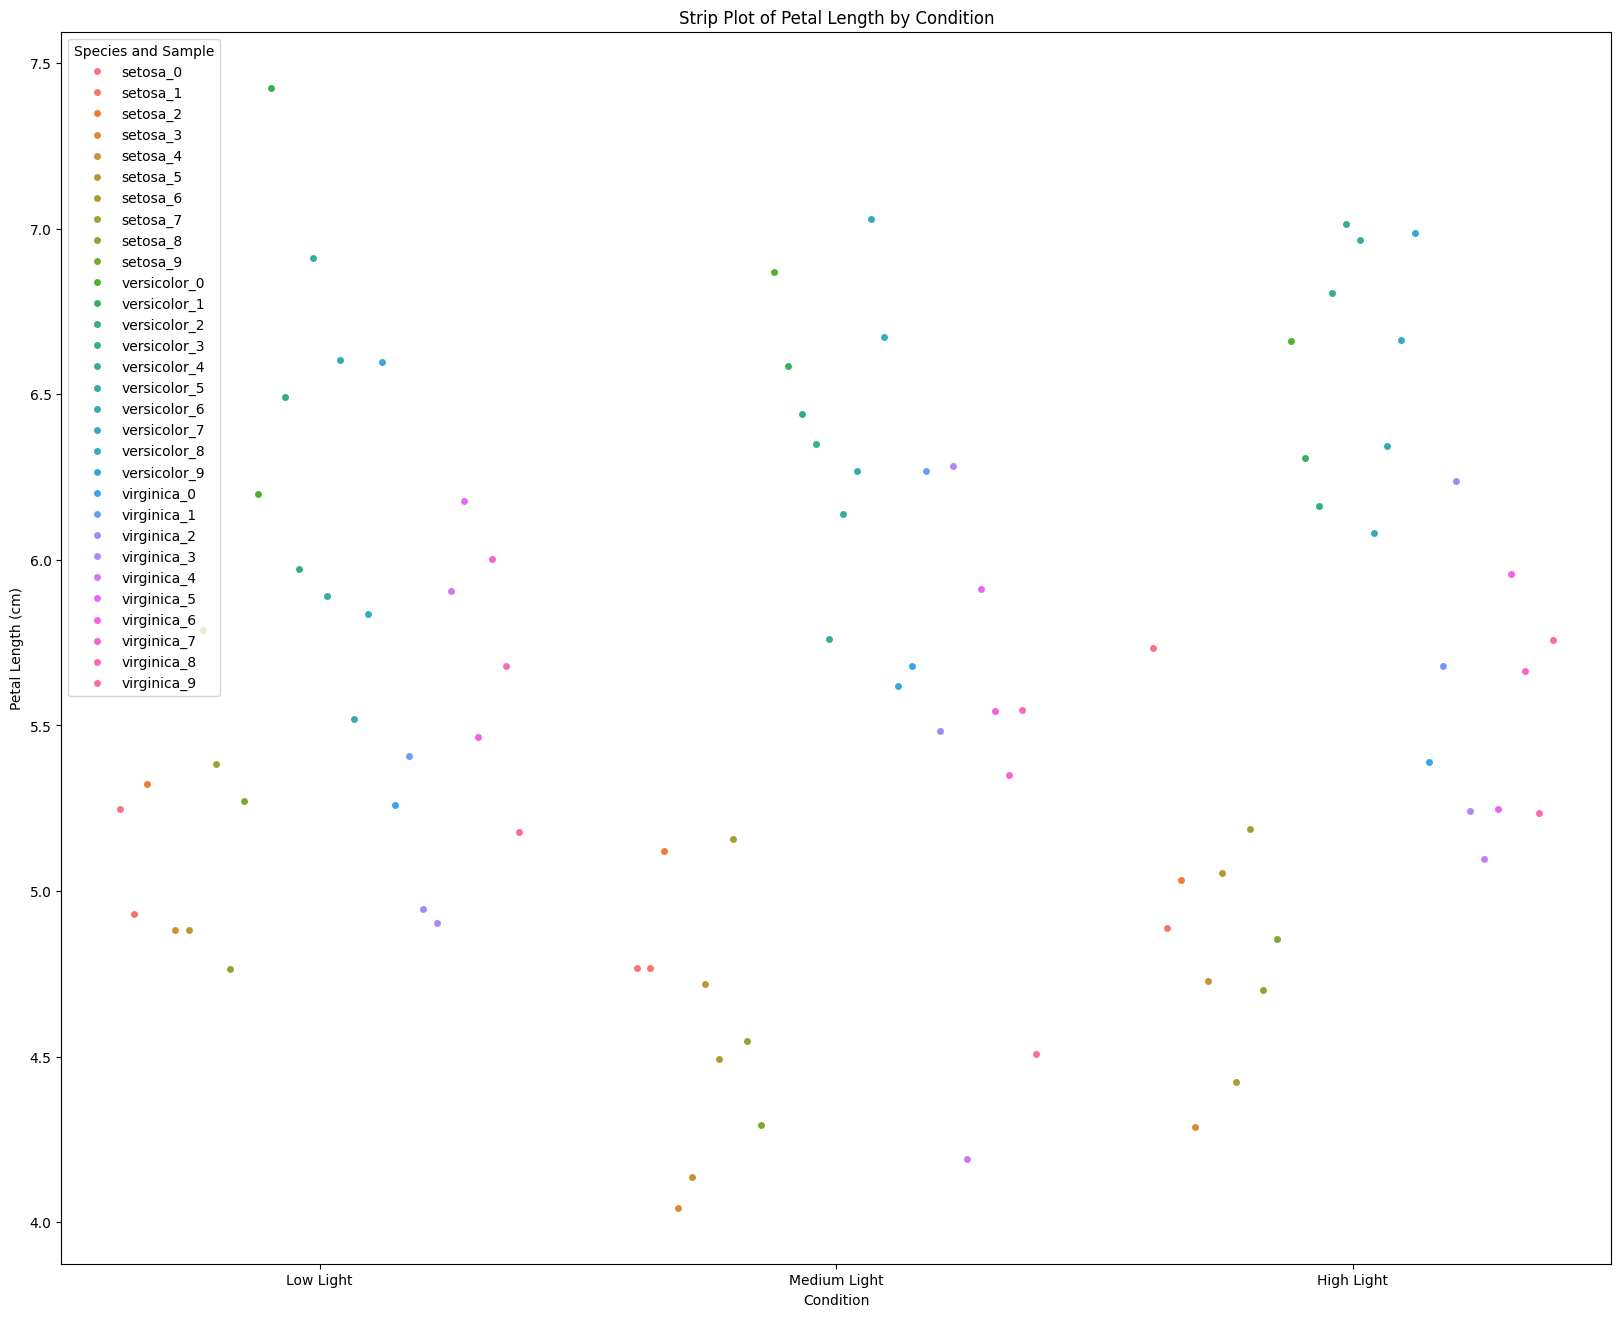

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(42)
n_samples = 10
conditions = ['Low Light', 'Medium Light', 'High Light']
species = ['setosa', 'versicolor', 'virginica']

# Create a DataFrame to hold the data
data = []
for sp in species:
    for cond in conditions:
        for i in range(n_samples):
            length = np.random.normal(loc=5.0 if sp == 'setosa' else (6.5 if sp == 'versicolor' else 5.5), scale=0.5)
            data.append({'subject': f'{sp}_{i}', 'condition': cond, 'petal_length': length})

df = pd.DataFrame(data)

# Perform Repeated Measures ANOVA
anova_results = AnovaRM(df, 'petal_length', 'subject', within=['condition']).fit()
print(anova_results)

# Strip Plot
plt.figure(figsize=(20, 16))
sns.stripplot(x='condition', y='petal_length', hue='subject', data=df, jitter=True, dodge=True)
plt.title('Strip Plot of Petal Length by Condition')
plt.ylabel('Petal Length (cm)')
plt.xlabel('Condition')
plt.legend(title='Species and Sample')
plt.show()
